In [72]:
                #importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [71]:
                #loading dataset 
df = pd.read_csv("C:\\Users\\Mahnoor Hashmi\\Desktop\\CO2 Emissions_Canada.csv")

In [58]:
                #transforming catagorical to numerical features
le = LabelEncoder()
Model_encoded = le.fit_transform(df['Model'])
Make_encoded = le.fit_transform(df['Make'])
Transmission_encoded = le.fit_transform(df['Transmission'])
Vehical_encoded = le.fit_transform(df['Vehicle Class'])
Fuel_encoded = le.fit_transform(df['Fuel Type'])

In [59]:
                #adding transformed featuresin the data frame
df['new_Make'] = Make_encoded
df['new_Model'] = Model_encoded
df['new_Transmission'] = Transmission_encoded
df['new_Vehicle_Class'] = Vehical_encoded
df['new_Fuel_Type'] = Fuel_encoded
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [60]:
                #dropping redundant variables
list=['Make','Model','Fuel Type', 'Vehicle Class','Transmission']
data=df.drop(list, axis=1)
print(data.head())

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  new_Make  new_Model  \
0                           33                  196         0       1057   
1                 

In [61]:
data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),new_Make,new_Model,new_Transmission,new_Vehicle_Class,new_Fuel_Type
0,2.0,4,9.9,6.7,8.5,33,196,0,1057,14,0,4
1,2.4,4,11.2,7.7,9.6,29,221,0,1057,25,0,4
2,1.5,4,6.0,5.8,5.9,48,136,0,1058,22,0,4
3,3.5,6,12.7,9.1,11.1,25,255,0,1233,15,11,4
4,3.5,6,12.1,8.7,10.6,27,244,0,1499,15,11,4


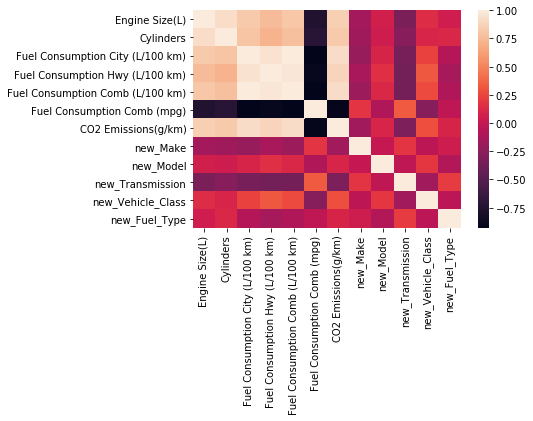

In [62]:
                #checking correlation using heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [63]:
                #assigning features their roles as dependant and independent
y= data["CO2 Emissions(g/km)"]
x= data[['new_Transmission','new_Vehicle_Class', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']]
print(data)

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                    

In [64]:
x.shape

(7385, 4)

In [65]:
y.shape

(7385,)

In [66]:
                #transforming data in a specific range
scaler = MinMaxScaler(feature_range=(0,1))
x= scaler.fit_transform(x)

In [67]:
                #spliting the data inro train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [68]:
                #declaring, fitting, evaluating and validting models
models = [LinearRegression(), KNeighborsRegressor()] 
for model in models:
    model.fit(X_train, Y_train)
    prediction = model.predict(X_train)
    print(type(model).__name__)
    print("MAE: ", mean_absolute_error(Y_train, prediction))
    print("RMSE: ", sqrt(mean_squared_error(Y_train, prediction)))
    print("R2: ", r2_score(Y_train, prediction))
    validation_score = cross_val_score(model, x, y, cv=10)
    print('Cross_validated score: ' , validation_score)
    print('Cross_validated mean: ', validation_score.mean())

LinearRegression
MAE:  13.443496420130234
RMSE:  20.407599795668926
R2:  0.8781734931111508
Cross_validated score:  [0.78098364 0.87804072 0.88741893 0.84326773 0.89131784 0.90898736
 0.86025115 0.86758551 0.92200745 0.89478396]
Cross_validated mean:  0.8734644291813494
KNeighborsRegressor
MAE:  3.604400812457684
RMSE:  6.803698862574173
R2:  0.9864590822432698
Cross_validated score:  [0.91568464 0.96944841 0.97285223 0.98525496 0.98172983 0.97683189
 0.97490192 0.98670711 0.97568645 0.97506837]
Cross_validated mean:  0.971416581671984
